**KNN**

According to this algorithm, which is used in classification, feature extraction during classification is used to look at the closeness of the new individual to be categorized to k of the previous individuals.
For example, you want to classify a new element for k = 3. in this case the nearest 3 of the old classified elements are taken. If these elements are included in the class, the new element is also included in that class. The euclide distance can be used in the distance calculation.

# Project - Classify Type of Patient from the biomechanical features of orthopedic patients.

# Install the necessary libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# import data 2C_weka.csv for 2 Class Classifcation.


In [2]:
df = pd.read_csv("2Classdata.csv") # Load data

# Explore the data set.Get necessary information about the data.

Look at the head and tail of dataset.
Find the missing value.
Look at the unique values of class values.
Look at the distribution of class values and other attributes.
Get the datatype information about the dataset
Plot the distribution of different classes for pelvic_radius and sacral_slope for visualization.

In [3]:
df.head(10)

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal
5,40.250200,13.921907,25.124950,26.328293,130.327871,2.230652,Abnormal
6,53.432928,15.864336,37.165934,37.568592,120.567523,5.988551,Abnormal
7,45.366754,10.755611,29.038349,34.611142,117.270068,-10.675871,Abnormal
8,43.790190,13.533753,42.690814,30.256437,125.002893,13.289018,Abnormal
9,36.686353,5.010884,41.948751,31.675469,84.241415,0.664437,Abnormal


In [4]:
df.tail(10)

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
300,50.676677,6.461501,35.000000,44.215175,116.587970,-0.214711,Normal
301,89.014875,26.075981,69.021259,62.938894,111.481075,6.061508,Normal
302,54.600316,21.488974,29.360216,33.111342,118.343321,-1.471067,Normal
303,34.382299,2.062683,32.390820,32.319617,128.300199,-3.365516,Normal
304,45.075450,12.306951,44.583177,32.768499,147.894637,-8.941709,Normal
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal
309,33.841641,5.073991,36.641233,28.767649,123.945244,-0.199249,Normal


In [5]:
df.shape

(310, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
pelvic_incidence            310 non-null float64
pelvic_tilt numeric         310 non-null float64
lumbar_lordosis_angle       310 non-null float64
sacral_slope                310 non-null float64
pelvic_radius               310 non-null float64
degree_spondylolisthesis    310 non-null float64
class                       310 non-null object
dtypes: float64(6), object(1)
memory usage: 17.0+ KB


In [7]:
df["class"].value_counts()

Abnormal    210
Normal      100
Name: class, dtype: int64

In [8]:
df.describe() 

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


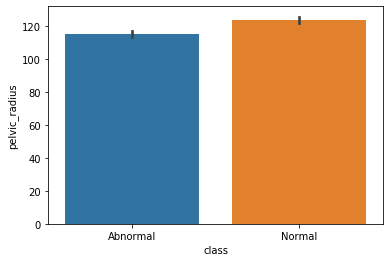

In [9]:
sns.barplot(x=df['class'], y=df.pelvic_radius)

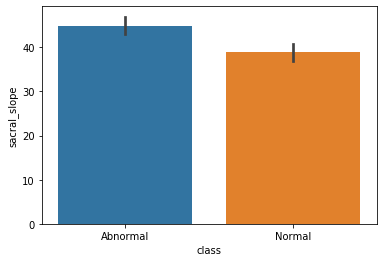

In [10]:
sns.barplot(x=df['class'], y=df.sacral_slope)

# Encode the Class variable to integer.

In [11]:
from sklearn.preprocessing import LabelEncoder
df["class"] = LabelEncoder().fit_transform(df["class"]) # converted to numeric values
df["class"].sample(10)

91     0
283    1
285    1
164    0
151    0
149    0
71     0
134    0
166    0
100    0
Name: class, dtype: int64

# Create the X(Feature-set) and Y(Target-set) sets for your Data.

In [12]:
X = df.drop('class', axis=1)
Y = df['class']

# Normalize your Data (X) to get values between 0 to 1.

In [13]:
from scipy.stats import zscore 
X_z = X.apply(zscore) # converting to Z score
X_z.head(5)

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,0.147086,0.501369,-0.665177,-0.184950,-1.447647,-0.708059
1,-1.245864,-0.748769,-1.453001,-1.041521,-0.264385,-0.579556
2,0.484370,0.467932,-0.099262,0.273083,-0.897686,-0.795421
3,0.511390,0.711562,-0.411339,0.126128,-1.207303,-0.402288
4,-0.626648,-0.789693,-1.274745,-0.215876,-0.733455,-0.490106


# Split the dat as train and test with a ratio of 70:30.

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

# Build the KNN model using Train Dataset and predict the class on test dataset.

In [15]:
from sklearn.neighbors import KNeighborsClassifier
NNH = KNeighborsClassifier(n_neighbors= 3 , weights = 'uniform', metric='euclidean')
NNH.fit(X_train,Y_train)
YPredict = NNH.predict(X_test)
YPredict

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0])

# Calculate the performance score of of your classification on test dataset.
Hint- You can use knn.score( ) function.

In [16]:
NNH.score(X_test,Y_test)

0.8602150537634409

In [17]:
from sklearn import metrics
metrics.confusion_matrix(Y_test, YPredict)
print(metrics.classification_report(Y_test, YPredict))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90        66
           1       0.75      0.78      0.76        27

    accuracy                           0.86        93
   macro avg       0.83      0.84      0.83        93
weighted avg       0.86      0.86      0.86        93



# What is the best K value for your classifcation?
#Find at which k value you get the best score.

In [18]:
for i in range(3,50,2):
    NNH = KNeighborsClassifier(n_neighbors= i , weights = 'uniform', metric='euclidean' )
    NNH.fit(X_train, Y_train)
    predicted_labels = NNH.predict(X_test)
    print("accuracy score with k =", i, "is",NNH.score(X_test, Y_test))
    #print(metrics.confusion_matrix(Y_test, predicted_labels))

accuracy score with k = 3 is 0.8602150537634409
accuracy score with k = 5 is 0.8494623655913979
accuracy score with k = 7 is 0.8494623655913979
accuracy score with k = 9 is 0.8494623655913979
accuracy score with k = 11 is 0.8064516129032258
accuracy score with k = 13 is 0.8709677419354839
accuracy score with k = 15 is 0.8494623655913979
accuracy score with k = 17 is 0.8709677419354839
accuracy score with k = 19 is 0.8387096774193549
accuracy score with k = 21 is 0.8494623655913979
accuracy score with k = 23 is 0.8387096774193549
accuracy score with k = 25 is 0.8279569892473119
accuracy score with k = 27 is 0.8172043010752689
accuracy score with k = 29 is 0.8172043010752689
accuracy score with k = 31 is 0.8064516129032258
accuracy score with k = 33 is 0.8172043010752689
accuracy score with k = 35 is 0.8064516129032258
accuracy score with k = 37 is 0.8172043010752689
accuracy score with k = 39 is 0.8172043010752689
accuracy score with k = 41 is 0.8064516129032258
accuracy score with k = 

## for Value of K = 13, we are getting the best score.

# import data 3C_weka.csv for 3 Class Classifcation and repeat all the steps which are given above.

In [19]:
df1 = pd.read_csv("3Classdata.csv") # Load data

In [20]:
df1.head(10)

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Hernia
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Hernia
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Hernia
5,40.250200,13.921907,25.124950,26.328293,130.327871,2.230652,Hernia
6,53.432928,15.864336,37.165934,37.568592,120.567523,5.988551,Hernia
7,45.366754,10.755611,29.038349,34.611142,117.270068,-10.675871,Hernia
8,43.790190,13.533753,42.690814,30.256437,125.002893,13.289018,Hernia
9,36.686353,5.010884,41.948751,31.675469,84.241415,0.664437,Hernia


In [21]:
df1.tail(10)

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
300,50.676677,6.461501,35.000000,44.215175,116.587970,-0.214711,Normal
301,89.014875,26.075981,69.021259,62.938894,111.481075,6.061508,Normal
302,54.600316,21.488974,29.360216,33.111342,118.343321,-1.471067,Normal
303,34.382299,2.062683,32.390820,32.319617,128.300199,-3.365516,Normal
304,45.075450,12.306951,44.583177,32.768499,147.894637,-8.941709,Normal
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal
309,33.841641,5.073991,36.641233,28.767649,123.945244,-0.199249,Normal


In [22]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
pelvic_incidence            310 non-null float64
pelvic_tilt                 310 non-null float64
lumbar_lordosis_angle       310 non-null float64
sacral_slope                310 non-null float64
pelvic_radius               310 non-null float64
degree_spondylolisthesis    310 non-null float64
class                       310 non-null object
dtypes: float64(6), object(1)
memory usage: 17.0+ KB


In [23]:
df1.shape

(310, 7)

In [24]:
df1["class"].value_counts()

Spondylolisthesis    150
Normal               100
Hernia                60
Name: class, dtype: int64

In [25]:
df1.describe()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


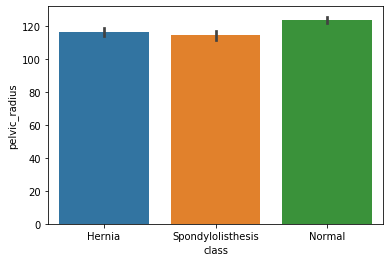

In [26]:
sns.barplot(x=df1['class'], y=df.pelvic_radius)

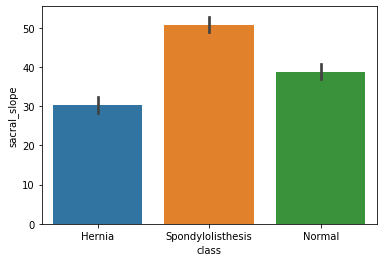

In [27]:
sns.barplot(x=df1['class'], y=df.sacral_slope)

In [28]:
from sklearn.preprocessing import LabelEncoder
df1["class"] = LabelEncoder().fit_transform(df["class"]) # converted to numeric values
df1["class"].sample(10)

140    0
241    1
126    0
52     0
62     0
93     0
232    1
85     0
281    1
152    0
Name: class, dtype: int64

In [29]:
X = df1.drop('class', axis=1)
Y = df1['class']

In [30]:
from scipy.stats import zscore 
X_z = X.apply(zscore) # converting to Z score
X_z.head(5)

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,0.147086,0.501369,-0.665177,-0.184950,-1.447647,-0.708059
1,-1.245864,-0.748769,-1.453001,-1.041521,-0.264385,-0.579556
2,0.484370,0.467932,-0.099262,0.273083,-0.897686,-0.795421
3,0.511390,0.711562,-0.411339,0.126128,-1.207303,-0.402288
4,-0.626648,-0.789693,-1.274745,-0.215876,-0.733455,-0.490106


In [31]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.30, random_state=1)

In [32]:
from sklearn.neighbors import KNeighborsClassifier
NNH = KNeighborsClassifier(n_neighbors= 5 , weights = 'uniform', metric='euclidean')
NNH.fit(Xtrain,Ytrain)
YPredict1 = NNH.predict(Xtest)
YPredict1

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0])

In [33]:
NNH.score(Xtest,Ytest)

0.8494623655913979

In [34]:
from sklearn import metrics
metrics.confusion_matrix(Ytest, YPredict1)
print(metrics.classification_report(Ytest, YPredict1))

              precision    recall  f1-score   support

           0       0.92      0.86      0.89        66
           1       0.71      0.81      0.76        27

    accuracy                           0.85        93
   macro avg       0.81      0.84      0.82        93
weighted avg       0.86      0.85      0.85        93



In [35]:
for i in range(3,50,2):
    NNH = KNeighborsClassifier(n_neighbors= i , weights = 'uniform', metric='euclidean' )
    NNH.fit(Xtrain, Ytrain)
    predicted_labels = NNH.predict(Xtest)
    print("accuracy score with k =", i, "is",NNH.score(Xtest, Ytest))

accuracy score with k = 3 is 0.8602150537634409
accuracy score with k = 5 is 0.8494623655913979
accuracy score with k = 7 is 0.8494623655913979
accuracy score with k = 9 is 0.8494623655913979
accuracy score with k = 11 is 0.8064516129032258
accuracy score with k = 13 is 0.8709677419354839
accuracy score with k = 15 is 0.8494623655913979
accuracy score with k = 17 is 0.8709677419354839
accuracy score with k = 19 is 0.8387096774193549
accuracy score with k = 21 is 0.8494623655913979
accuracy score with k = 23 is 0.8387096774193549
accuracy score with k = 25 is 0.8279569892473119
accuracy score with k = 27 is 0.8172043010752689
accuracy score with k = 29 is 0.8172043010752689
accuracy score with k = 31 is 0.8064516129032258
accuracy score with k = 33 is 0.8172043010752689
accuracy score with k = 35 is 0.8064516129032258
accuracy score with k = 37 is 0.8172043010752689
accuracy score with k = 39 is 0.8172043010752689
accuracy score with k = 41 is 0.8064516129032258
accuracy score with k = 

### for Value of K = 13, we are getting the best score.